<h1 style="text-align:center">KLASIFIKASI 2 KELAS</h1> 

### Activation pada Dense

Setelah kita melakukan regresi menggunakan activation `relu` dan `linear`, pada pertemuan kali ini, kita akan mencoba melakukan klasifikasi menggunakan Dense dengan 2 jenis activation yang berbeda yaitu

1.   `sigmoid`
2.   `softmax`

Jika `linear` kita pergunakan untuk output yang berupa `float`, maka `sigmoid` dan `softmax` kita pergunakan untuk kasus klasifikasi dengan hasil dalam bentuk persentase.

# Sigmoid

`sigmoid` kita pergunakan jika kelas yang kita klasifikasikan/kategorikan hanya berjumlah 2 kelas saja. Istilah lainnya untuk kasus ini adalah kasus biner atau binary. Contohnya, kelas `ya` dan `tidak`, atau kelas `cowok` dan `cewek`, atau kelas `sehat` dan `sakit`, dan seterusnya. Tentu saja, kelas-kelas ini haruslah kita representasikan dalam bentuk `0` dan `1`.

# Persiapan Data

In [2]:
import pandas as pd

df= pd.read_csv("C:/Users/LENOVO/Praktikum DL/Praktikum_DL/Pertemuan 2/Dataset/dataset_klasifikasi_biner.csv")
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.633563,0.357385,-0.503931,0.935066,0.647981,-0.050796,-1.933989,2.081684,0.041266,-0.258298,1
1,1.283905,1.109459,-0.908953,1.006586,0.492219,1.107295,1.243526,-0.172200,1.150359,0.147744,1
2,-0.966476,-0.593314,0.458020,1.032323,1.283685,-0.317640,1.499045,0.434477,0.423678,1.251380,1
3,2.429309,-1.306530,-1.869925,3.092164,2.028800,-0.879635,-0.393494,-0.101213,-1.624066,0.443553,1
4,-1.204798,0.078464,0.705181,0.224765,0.618707,1.534946,-0.302288,2.325055,0.495505,0.538133,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.606404,0.228927,0.959690,0.145821,0.682755,-0.927143,-0.280438,0.789222,-1.330100,-1.463687,0
9996,1.154048,-0.120265,-0.643621,-0.467386,-0.825604,0.725398,-1.439272,-1.132146,1.511610,-0.114986,0
9997,0.841468,-0.593749,-0.391671,-0.955036,-1.169619,0.683856,-1.629486,0.289335,-0.434358,-1.271335,0
9998,1.080252,-0.607761,-0.488605,-1.338506,-1.605447,-1.689724,0.202908,0.291496,0.827980,-1.069399,0


# Membagi Dataset

In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import train_test_split

x = df.drop('y', axis=1).values
y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# Membuat Arsitektur Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Kemudian mari kita siapkan JST dengan susunan `32-16-8-4-2` dan `1`. Perhatikan, pada layer terakhir kita beri nilai `Dense`-nya `1` dengan activation `sigmoid`.

# Compile Model

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1065 (4.16 KB)
Trainable params: 1065 (4

Untuk kasus klasifikasi biner, kita bisa pergunakan `loss`-nya `binary_crossentropy`. Kemudian, selain `loss`, pada praktikum kali ini kita tambahkan satu lagi variabel `metrics` dengan isian `'accuracy'`, untuk mengetahui seberapa akurat otak kita.

# Training Model

In [19]:
catatan = model.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=100)

Epoch 1/100
25/25 [==============================] - 4s 32ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6931 - val_accuracy: 0.5188
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4812
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6932 - val_accuracy: 0.4812
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.4812
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.4812
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.4812
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.4812
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 60/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 61/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 62/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 63/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 64/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 65/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 

# Plot Performa Model

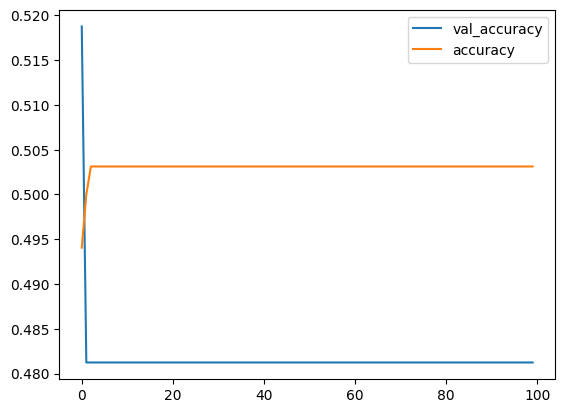

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(len(catatan.history['val_accuracy'])), catatan.history['val_accuracy'], label='val_accuracy')
plt.plot(range(len(catatan.history['accuracy'])), catatan.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

# Evaluasi Model

In [22]:
loss, acc = model.evaluate(x_test, y_test)
print('Accuracy Model : ', acc)

63/63 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4990
Accuracy Model :  0.49900001287460327


# Prediksi Model

In [23]:
pred = model.predict(x_test)
pred

63/63 [==============================] - 0s 2ms/step


array([[0.4969585],
       [0.4969585],
       [0.4969585],
       ...,
       [0.4969585],
       [0.4969585],
       [0.4969585]], dtype=float32)

Untuk menormalisasikan ke dalam bentuk `0` dan `1`, maka kita perlu menambahkan baris kode sebagai berikut, yang intinya untuk segala nilai yang di atas $0.5$ akan kita rubah ke `kelas 1` dan untuk segala nilai yang di bawah $0.5$ akan kita rubah ke `kelas 0`.

In [24]:
pred = (pred > 0.5)*1
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Evaluasi dengan Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(pred, y_test))

[[ 998 1002]
 [   0    0]]
